###  Machine Learning Section of Black Friday Price Prediction.

In [1]:
# import the required libraries

# Libraries for data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# For optimizing algoritm
from sklearn.model_selection import GridSearchCV


# sklearn libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# sklearn libraries for evaluating models
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# import datasets

final_df = pd.read_csv('final_data.csv') # train data
final_df.head() # check the train data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,1


In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  550068 non-null  int64  
 1   User_ID                     550068 non-null  int64  
 2   Product_ID                  550068 non-null  float64
 3   Gender                      550068 non-null  int64  
 4   Age                         550068 non-null  int64  
 5   Occupation                  550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  City_Category_1             550068 non-null  int64  
 12  City_Category_2             550068 non-null  int64  
dtypes: float64(3),

In [3]:
# We've still the "User_ID" & "Unnamed" column which is not needed. We may missed it up in last section
# Let's drop it
final_df.drop(['User_ID'], axis = 1, inplace = True)

In [5]:
# Before starting let's Seperate the dependent variable or input and the target or output

X = final_df.drop('Purchase', axis = 1) # input
y = final_df['Purchase'] # target
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_1,City_Category_2
0,-1.028774,0,0,10,2,0,3,9.842329,0,0
1,0.722139,0,0,10,2,0,1,6.000000,0,0
2,-0.845799,0,0,10,2,0,12,9.842329,0,0
3,-0.869157,0,0,10,2,0,12,14.000000,0,0
4,1.077382,1,6,16,4,0,8,9.842329,0,1


In [6]:
# Split the dataset into train & test set.
# This this problem I'll use 80 20 rule or use 20% of the dataset as test data and use random_state = 41

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # checking the shape of the train & test set

(440054, 10) (110014, 10) (440054,) (110014,)


In [7]:
# Now, Scaling the data for better performance in machine learning

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

#### Feature Selection.
For selecting optimum feature I'll use "SequentialFeatureSelector" for forward selection and also use an ensemble ML algorithm which is Random Forest Regressor in this case. Finding optimum feature with this two I'll implement models with these models and show you how different model perform differently. And select the final model based on high performance.

In [8]:
# Implementing Random Forest Regressor

lin_reg = LinearRegression()

# Feature Selection
sfs = SFS(estimator=lin_reg, k_features= (3, 10), forward=True, floating=False, scoring = 'r2', cv = 3, n_jobs=-1) # Creating instance
sfs.fit(x_train, y_train) # fitting the data
sfs.k_feature_names_  # getting feature names

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

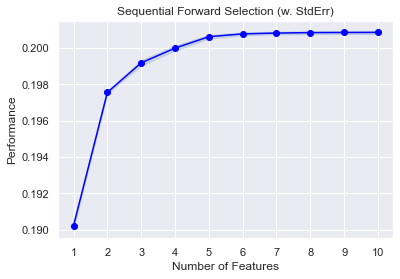

In [9]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.show()

The above plot show that all the features are very important for this project. So we will all the features to build our models.

#### Linear Regression

In [10]:
# Linear Regression
lin_reg = LinearRegression() # creating Instances
lin_reg.fit(x_train, y_train) # fitting train & test data

# prediction 
y_pred = lin_reg.predict(x_test) # making prediction with the model

In [11]:
# evaluation model performance

lin_score = r2_score(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('r2_score: {}'.format(lin_score))
print('Mean Absolute Error: {}'.format(lin_mae))
print('Mean Squared Error: {}'.format(lin_mse))
print('Root Mean Squared Error: {}'.format(lin_rmse))

r2_score: 0.1952078468066455
Mean Absolute Error: 0.45410009852678723
Mean Squared Error: 0.4333461031733965
Root Mean Squared Error: 0.6582902879227344


Here we've very low r2_score which is almost 0.20 and the higher Root Means Squared Error(RMSE) which is 0.66

It means that our model is not performing very well in this case.Let's use some other algorithm

#### Lasso Regression

In [12]:
# lasso regression
las_reg = Lasso(normalize= True) # creating Instances
las_reg.fit(x_train, y_train) # fitting train & test data
las_pred = las_reg.predict(x_test) # making prediction with the model

In [13]:
# evaluation model performance
las_score = r2_score(y_test, las_pred)
las_mae = mean_absolute_error(y_test, las_pred)
las_mse = mean_squared_error(y_test, las_pred)
las_rmse = np.sqrt(las_mse)

print('r2_score: {}'.format(las_score))
print('Mean Absolute Error: {}'.format(las_mae))
print('Mean Squared Error: {}'.format(las_mse))
print('Root Mean Squared Error: {}'.format(las_rmse))

r2_score: -1.542377588825694e-05
Mean Absolute Error: 0.507428965924003
Mean Squared Error: 0.5384654724664781
Root Mean Squared Error: 0.7338020662729685


Here we've low r2_score which is almost -1.54 which is very very bad and the high Root Means Squared Error(RMSE) which is 0.73

It means that our model is performing very bad in this case.


#### Decision Tree Algorithm

In [14]:
# decision tree
d_tree = DecisionTreeRegressor(max_depth=12)  # creating Instances
d_tree.fit(x_train, y_train) # fitting train & test data
d_pred = d_tree.predict(x_test) # making prediction with the model

In [15]:
# evaluation model performance

d_tree_score = r2_score(y_test, d_pred)
d_tree_mae = mean_absolute_error(y_test, d_pred)
d_tree_mse = mean_squared_error(y_test, d_pred)
d_tree_rmse = np.sqrt(d_tree_mse)

print('r2_score: {}'.format(d_tree_score))
print('Mean Absolute Error: {}'.format(d_tree_mae))
print('Mean Squared Error: {}'.format(d_tree_mse))
print('Root Mean Squared Error: {}'.format(d_tree_rmse))

r2_score: 0.7550032998623611
Mean Absolute Error: 0.2678488203898622
Mean Squared Error: 0.13192022918429172
Root Mean Squared Error: 0.3632082449288448


Here we've high r2_score which is almost 0.75 which is great and the low Root Means Squared Error(RMSE) which is 0.36

It means that our model is performing very well in this case. Let's use some other algorithms so that if we could found some more efficient algorithm for our final model.

#### Random Forest Regression

In [16]:
# random forest
r_forest = RandomForestRegressor(max_depth = 12) # creating Instances
r_forest.fit(x_train, y_train) # fitting train & test data
rf_pred = r_forest.predict(x_test) # making prediction with the model

In [17]:
# evaluation model performance
r_forest_score = r2_score(y_test, rf_pred)
r_forest_mae = mean_absolute_error(y_test, rf_pred)
r_forest_mse = mean_squared_error(y_test, rf_pred)
r_forest_rmse = np.sqrt(r_forest_mse)

print('r2_score: {}'.format(r_forest_score))
print('Mean Absolute Error: {}'.format(r_forest_mae))
print('Mean Squared Error: {}'.format(r_forest_mse))
print('Root Mean Squared Error: {}'.format(r_forest_rmse))

r2_score: 0.7636119301521681
Mean Absolute Error: 0.26430679962353726
Mean Squared Error: 0.12728485050304347
Root Mean Squared Error: 0.3567700246700155


Here we've high r2_score which is almost 0.76 which is great and the low Root Means Squared Error(RMSE) which is 0.35

It means that our model is performing very well in this case.

From the above we can see that Random Forest is performing very well. Now let's try some hyper parameter tuning and see if we can improve our model or not. And Visualize the final Result.

In [18]:
# Now let's create a performance dataframe and visualize the result with a plot to understand visually.
performance = {'r2_score':[lin_score, las_score, d_tree_score, r_forest_score],
              'MAE':[lin_mae, las_mae, d_tree_mae,  r_forest_mae],
              'MSE': [lin_mse, las_mse, d_tree_mse, r_forest_mse],
              'RMSE': [lin_rmse, las_rmse, d_tree_rmse, r_forest_rmse]}

In [19]:

performance_df = pd.DataFrame(data = performance, index= ['Linear Regression', 
                                                          'Lasso Regression', 'Decision Tree Regressor',
                                                          'Random Forest Regressor'])

performance_df

,r2_score,MAE,MSE,RMSE
Linear Regression,0.195208,0.454100,0.433346,0.658290
Lasso Regression,-0.000015,0.507429,0.538465,0.733802
Decision Tree Regressor,0.755003,0.267849,0.131920,0.363208
Random Forest Regressor,0.763612,0.264307,0.127285,0.356770


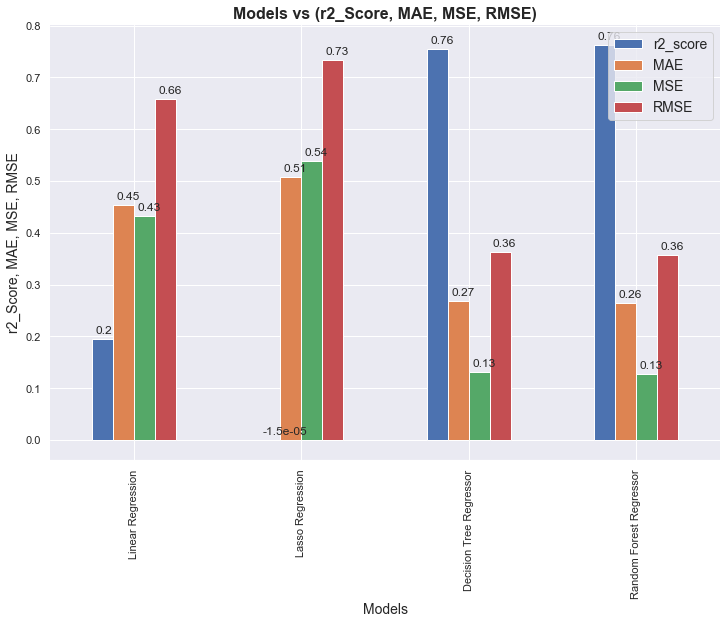

In [22]:
# Model performance chart

ax1 = performance_df.plot(kind="bar", figsize=(12,8))
ax1.set_title('Models vs (r2_Score, MAE, MSE, RMSE)', fontdict= {'weight': 'bold', 'size': 16})
plt.xlabel('Models', fontdict= {'size': 14})
plt.ylabel('r2_Score, MAE, MSE, RMSE',fontdict= {'size': 14})
ax1.legend(fontsize = 14)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Adding the percentage values    
for p in ax1.patches:
    ax1.annotate("{:.2}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))

From the above we can clearly see that the Decision Tree Regressor & Random Forest Regressor performs best. Now let's do some hyper parameter tuning to optimize the performance. 

For this notebook We'll do hyper parameter only for Random Forest Regression algorithm.

#### Optimizing Random Forest Regression (Hyper parameter Tuning)
I'll "GridSearchCV" for this

In [23]:
# Parameters
n_estimator = [50, 70, 120]
max_dept = [5, 11, None]
max_feature = [0.25, 0.50, 0.75, 1.00]
n_sample =  [0.50, 0.75, 1.00]
random_state = [0, 41, 42, 101]

In [25]:
# parameter dictionary

params = {
    'n_estimators': n_estimator,
    'max_depth': max_dept,
    'max_features': max_feature,
    'max_samples': n_sample,
    'random_state': random_state
}

In [ ]:
# applying gridsearch to the dataset

grid_search = GridSearchCV(estimator= r_forest, param_grid=params, cv = 5, verbose = 3,  n_jobs=-1) # creating instance
gridsearch = grid_search.fit(x_train, y_train) # fitting the data & store in a variable
best_acc = gridsearch.best_score_ # best score
best_params = gridsearch.best_params_ # the optimum parameters

# Printing the best accuracy & parameters
print(best_acc)
print(best_params)